In [1]:
import sys  
sys.path.insert(0, '../Libraries/') 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Weather data
* Source: https://www.visualcrossing.com/ Fee for uploading more than 100 lines of info. Please contact me with your needs, I will happily pay for your data
* Units: 
    * Wind: $\mathrm{km}/\mathrm{h}$ 
    * Temperatures (atmospheric, dew point): $^\circ\mathrm{C}$
    * Solar Radiation: $\mathrm{W}/\mathrm{m}^2$
    * Precipitation: $\mathrm{mm}$


In [4]:
xl = pd.ExcelFile('Climate/April-October-2020.xlsx')

### Available locations

In [5]:
xl.sheet_names 

['Canmore, AB',
 'Craftsbury, VT',
 'Bend, OR',
 'Bozeman, MT',
 'Essex Junction, VT',
 'Lake Placid, NY',
 'Minneapolis, MN',
 'Nagano City, Japan',
 'Randolph, VT',
 'Soldier Hollow, UT',
 'Villard de Lans, France']

# Note
The Nagano City data is missing a big chunk of radiation data (7/23 to 8/27). Bend is missing radiation data between 7/17 to 7/25. Other locations did not show obvious issues. For exotic locations, I have added my childhood place (last one).

In [ ]:
loc = xl.sheet_names[-1]
weather = pd.read_excel("Climate/April-October-2020.xlsx",
                        sheet_name=loc,header=0,
                        converters= {'Date time': pd.to_datetime},)
weather = weather.set_index('Date time')
weather['Name'].head(10)

In [76]:
weather['Solar Radiation'] = weather['Solar Radiation'].fillna(0.0)
weather['Cloud Cover'] = weather['Cloud Cover'].fillna(0.0)
weather['Precipitation'] = weather['Precipitation'].fillna(0.0)
weather['Name'].head(-2)

Date time
2020-04-01 00:00:00    Bend, OR, United States
2020-04-01 00:15:00    Bend, OR, United States
2020-04-01 00:30:00    Bend, OR, United States
2020-04-01 00:45:00    Bend, OR, United States
2020-04-01 01:00:00    Bend, OR, United States
                                ...           
2020-10-30 22:30:00    Bend, OR, United States
2020-10-30 22:45:00    Bend, OR, United States
2020-10-30 23:00:00    Bend, OR, United States
2020-10-30 23:15:00    Bend, OR, United States
2020-10-30 23:30:00    Bend, OR, United States
Name: Name, Length: 20447, dtype: object

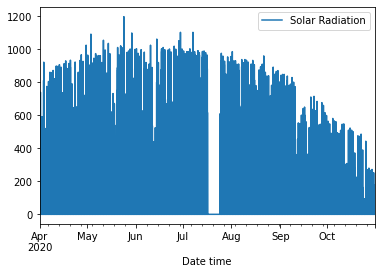

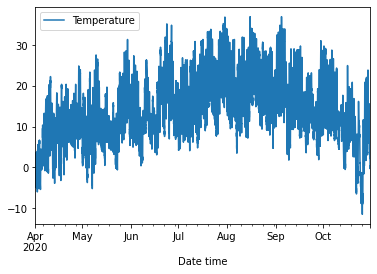

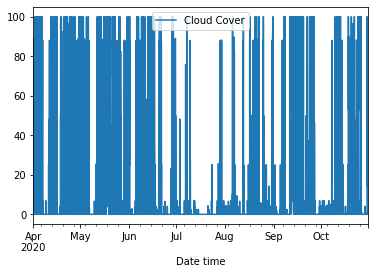

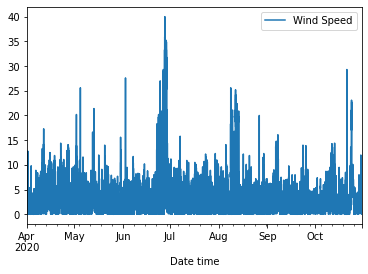

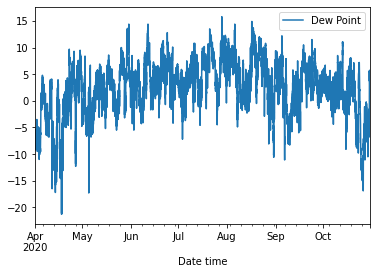

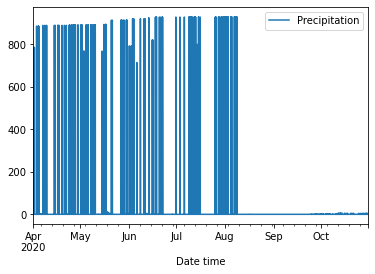

In [77]:
ax0 = weather.plot(y='Solar Radiation')
ax0 = weather.plot(y='Temperature')
ax0 = weather.plot(y='Cloud Cover')
ax0 = weather.plot(y='Wind Speed')
ax0 = weather.plot(y='Dew Point')
ax0 = weather.plot(y='Precipitation')
# ax0.set_xlim(pd.Timestamp('2020-07-12 00:00:00'),pd.Timestamp('2020-7-28 00:00:00'))
# ax0.set_xlim(pd.Timestamp('07/01/2020 00:00:00'),pd.Timestamp('07/27/2020 00:00:00'))

In [40]:
irefmin = weather.index.get_loc('2020-07-16 00:00:00')
irefmax = weather.index.get_loc('2020-07-16 23:45:00')
print(irefmin,irefmax)

10176 10271


In [ ]:
for i in range(17,25):
    day = '2020-07-'+str(i).zfill(2)
    imin = weather.index.get_loc(day+' 00:00:00')
    imax = weather.index.get_loc(day+' 23:45:00')
    weather['Solar Radiation'][imin:imax+1] = weather['Solar Radiation'][irefmin:irefmax+1]

In [ ]:
ax0 = weather.plot(y='Solar Radiation')
# ax0 = weather.plot(y='Cloud Cover')
ax0.set_xlim(pd.Timestamp('2020-07-13'),pd.Timestamp('2020-07-27'))

In [ ]:
loc = Location[3]
weather = pd.read_excel("Climate/April-October-2020.xlsx",sheet_name=loc,header=0,date_parser=[5],)
weather = weather.set_index('Date time')

In [ ]:
weather['Solar Radiation'] = weather['Solar Radiation'].fillna(0.0)
weather['Solar Radiation'] = weather['Solar Radiation'].interpolate('cubic')

In [ ]:
ax0 = weather.plot(y='Solar Radiation')
# ax0 = weather.plot(y='Cloud Cover')
ax0.set_xlim(pd.Timestamp('2020-06-20'),pd.Timestamp('2020-06-23'))

In [ ]:
loc = Location[3]
utah = pd.read_excel("Climate/April-October-2020.xlsx",sheet_name=loc,header=0,date_parser=[5],)
utah = utah.set_index('Date time')
utah['Solar Radiation'] = utah['Solar Radiation'].fillna(0.0)
loc = Location[2]
randolph = pd.read_excel("Climate/April-October-2020.xlsx",sheet_name=loc,header=0,date_parser=[5],)
randolph = randolph.set_index('Date time')
randolph['Solar Radiation'] = randolph['Solar Radiation'].fillna(0.0)

In [ ]:
utah_1D = utah.resample('1D').mean()
randoplh_1D = randolph.resample('1D').mean()

In [ ]:
ax0 = utah_1D.plot(y='Dew Point')
randoplh_1D.plot(y='Dew Point',ax = ax0)

In [ ]:
weather.shape

In [ ]:
weather.columns